In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Data Loading

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop(['customerID'], axis =1, inplace=True)

# Data Visualization

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Univariate data visualization

In [8]:
obj_col = [col for col in df.columns if df[col].dtype == 'object']

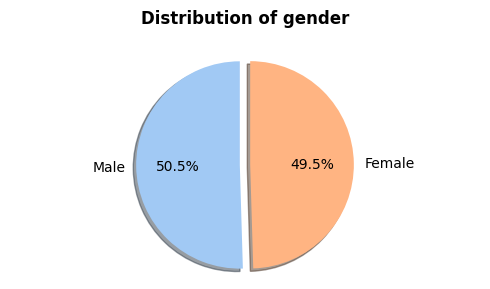

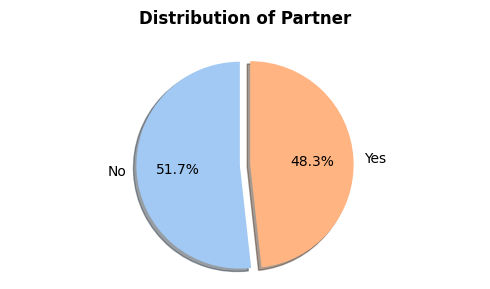

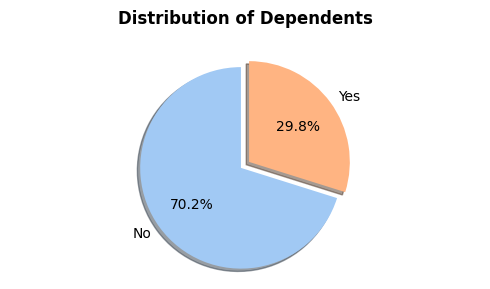

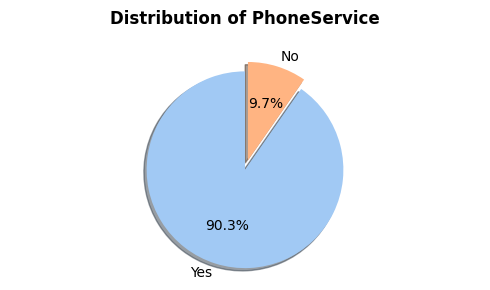

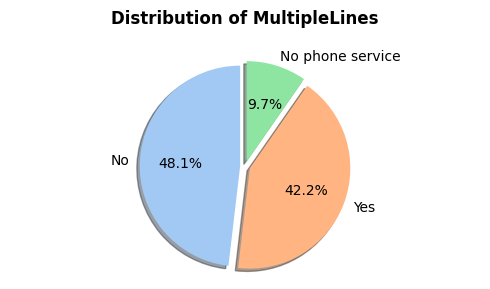

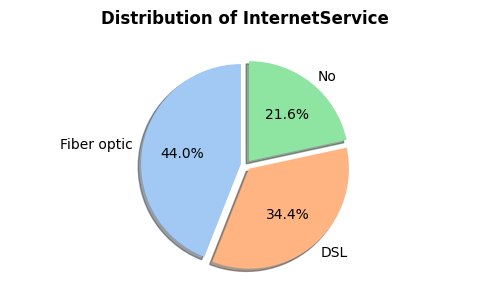

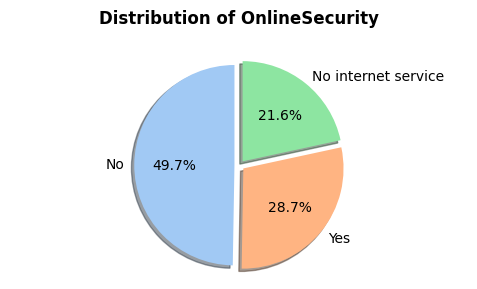

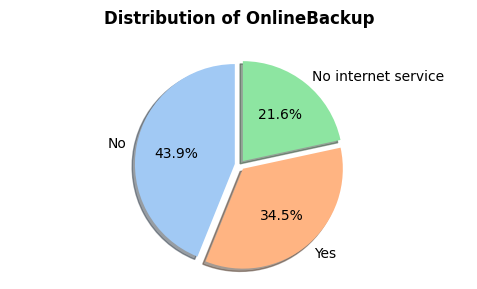

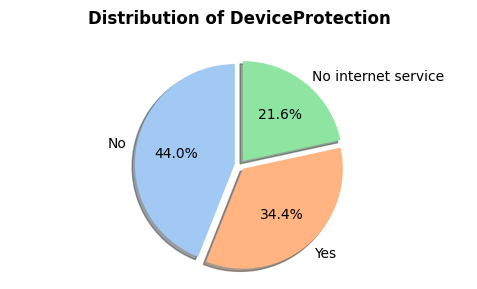

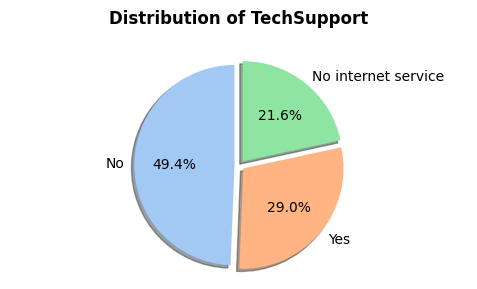

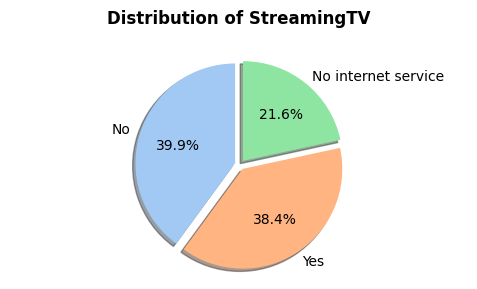

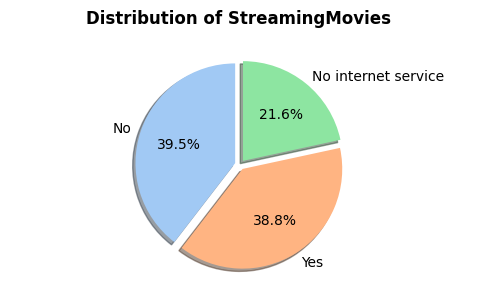

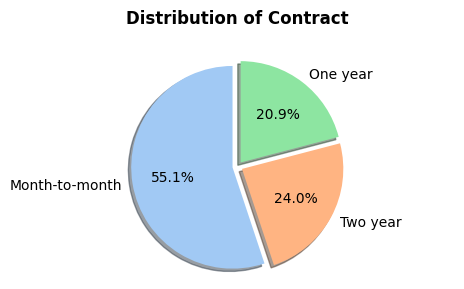

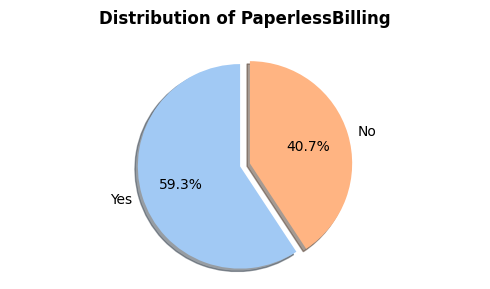

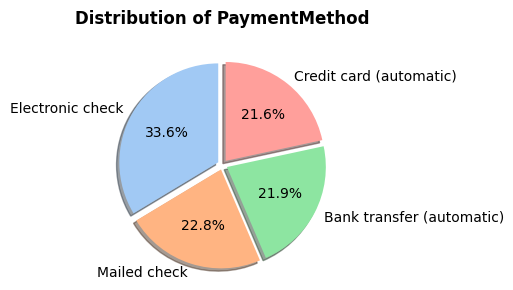

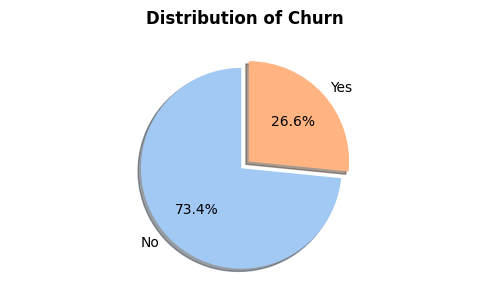

In [9]:
for col in obj_col:
    plt.figure(figsize=(5,3))
    plt.pie(df[col].value_counts(), labels = df[col].value_counts().index, autopct="%1.1f%%", startangle=90
           ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df[col].value_counts())
           )
    plt.title(f'Distribution of {col}', fontweight='bold', pad=20)  
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

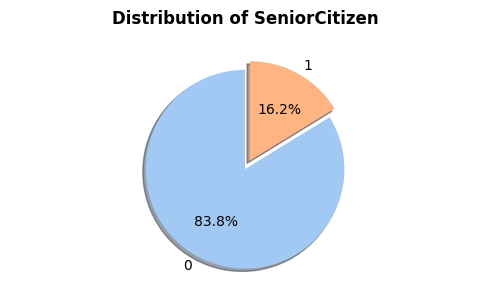

In [10]:
plt.figure(figsize=(5,3))
plt.pie(df['SeniorCitizen'].value_counts(), labels = df['SeniorCitizen'].value_counts().index, autopct="%1.1f%%", startangle=90
       ,shadow=True,colors=sns.color_palette("pastel"), explode=[0.05] * len(df['SeniorCitizen'].value_counts())
       )
plt.title(f'Distribution of SeniorCitizen', fontweight='bold', pad=20)  
plt.axis('equal')
plt.tight_layout()
plt.show()

In [11]:
numerical_col = [col for col in df.columns if col not in obj_col]
numerical_col.remove('SeniorCitizen')

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


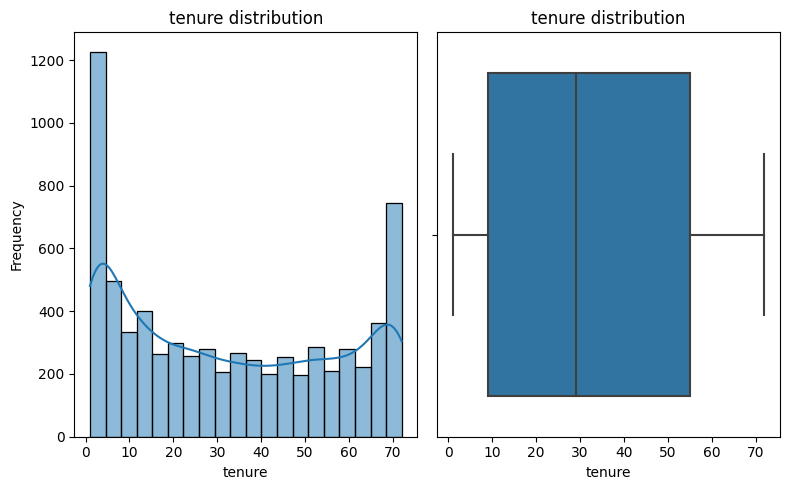

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


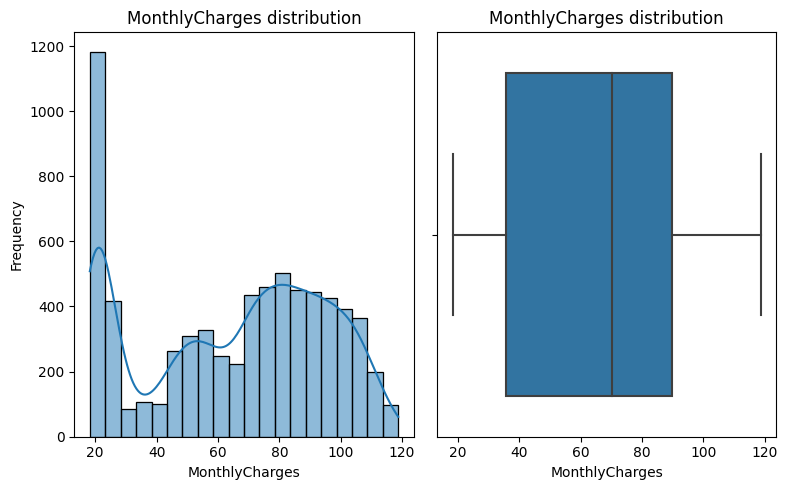

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


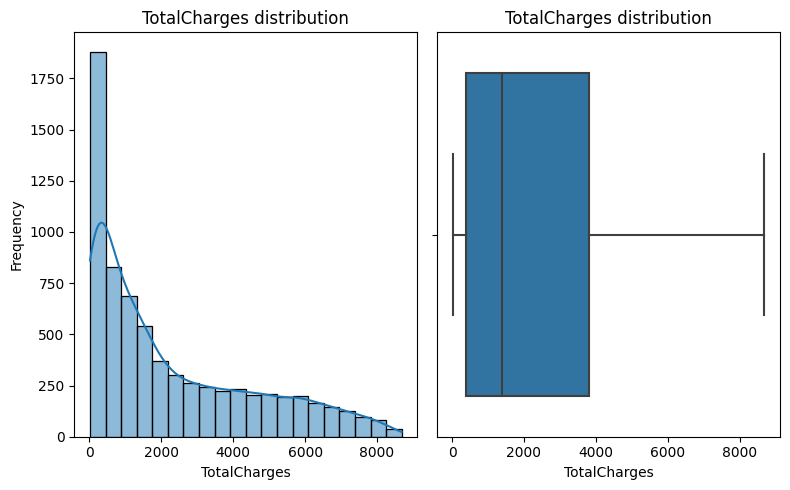

In [13]:
for col in numerical_col:
    plt.figure(figsize=(8,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()

## Bivariate Analysis

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
for col in obj_col:
    df[col] = encoder.fit_transform(df[col])

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

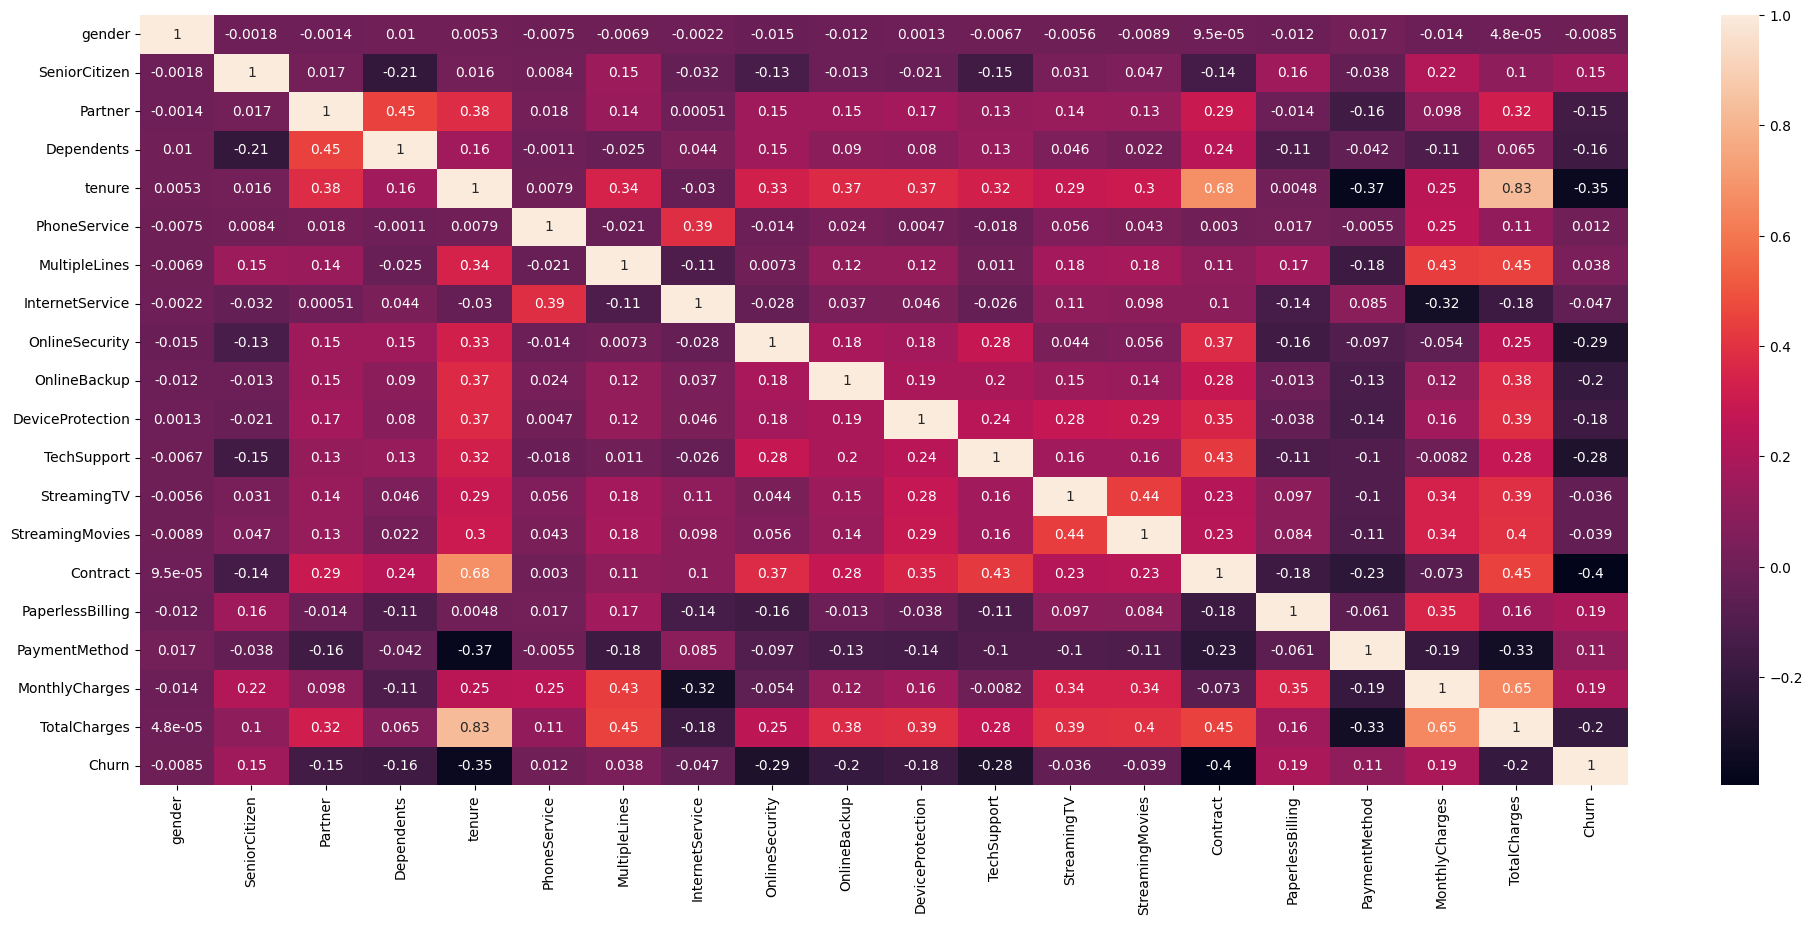

In [17]:
plt.figure(figsize=(24,10))
data_corr = df.corr()
sns.heatmap(data_corr, annot=True)

# Data Preprocessing

In [19]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.fit_transform(X_test[numerical_col])

# Modelling

In [29]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [30]:
predict = model.predict(X=X_test)

In [31]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [32]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
predict = forest.predict(X_test)

In [34]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [38]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [39]:
predict = naive_bayes.predict(X_test)

In [40]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      1033
           1       0.51      0.73      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407

